In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss

In [223]:
dataframe = pd.read_csv('../../data/DailyDelhiClimateTrain.csv')
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['date'] = dataframe['date'].dt.to_period('M').astype(str)
dataframe.drop(columns=['humidity', 'wind_speed', 'meanpressure'], inplace=True)
dataframe.drop(dataframe.index[-1], inplace=True)
dataframe

,date,meantemp
0,2013-01,10.000000
1,2013-01,7.400000
2,2013-01,7.166667
3,2013-01,8.666667
4,2013-01,6.000000
...,...,...
1456,2016-12,16.850000
1457,2016-12,17.217391
1458,2016-12,15.238095
1459,2016-12,14.095238


# Transformando os dados de diarios para mensais

In [224]:
dataframe = dataframe.groupby('date')['meantemp'].mean().reset_index()
dataframe.set_index('date', inplace=True)
dataframe

,meantemp
date,
2013-01,12.074770
2013-02,16.867560
2013-03,22.814209
2013-04,28.895119
2013-05,33.776767
2013-06,32.480873
2013-07,30.663594
2013-08,29.547773
2013-09,29.840595


In [225]:
px.line(dataframe, x=dataframe.index, y='meantemp')

# Plot de ACF e PACF

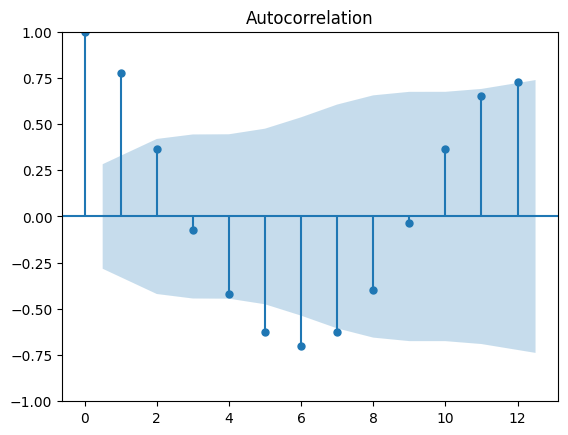

In [226]:
plot_acf(dataframe, lags=12)
plt.show()

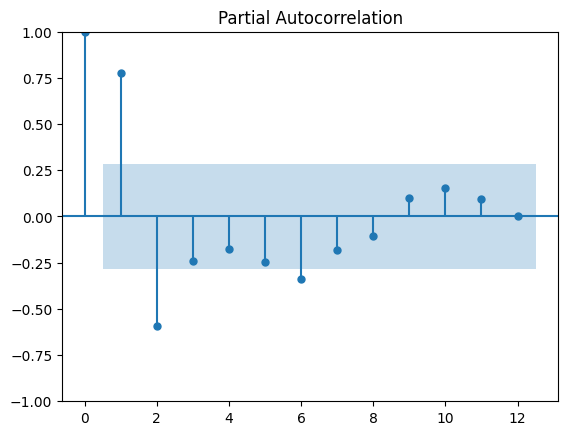

In [227]:
plot_pacf(dataframe, lags=12)
plt.show()

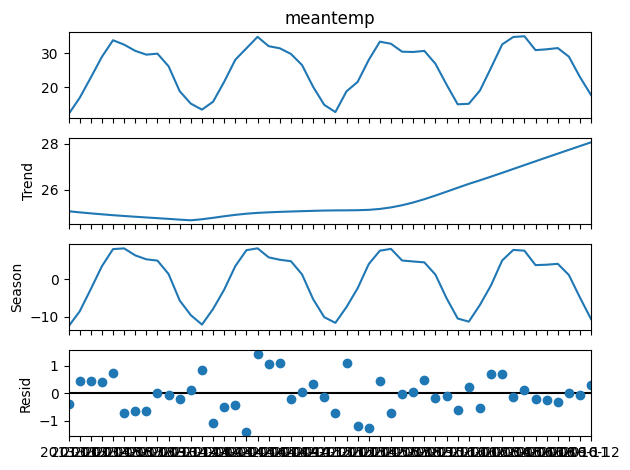

In [228]:
df_colum = dataframe['meantemp']
res = STL(df_colum, period=12).fit()
res.plot()
plt.show()

# Teste de estacionariedade 

In [229]:
result = adfuller(dataframe)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.29190286702070994
p-value: 0.9769699297633486


In [230]:
result = kpss(dataframe)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

KPSS Statistic: 0.0674196025615499
p-value: 0.1


C:\Users\golf\AppData\Local\Temp\ipykernel_7268\3319380636.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Aplicando o ARIMA (1,1,1)

In [231]:
dataframe.head()

,meantemp
date,
2013-01,12.074770
2013-02,16.867560
2013-03,22.814209
2013-04,28.895119
2013-05,33.776767


In [232]:
model = ARIMA(dataframe, order=(1, 1, 1))
modelfit = model.fit()

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [233]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -117.148
Date:                Sat, 08 Jun 2024   AIC                            240.295
Time:                        11:34:48   BIC                            245.846
Sample:                    01-01-2013   HQIC                           242.384
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5534      0.182      3.040      0.002       0.197       0.910
ma.L1          0.3015      0.191      1.578      0.115      -0.073       0.676
sigma2         8.4211      2.195      3.837      0.000       4.120      12.722
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.69   Prob(JB):                         0.55
Heteroskedasticity (H):               1.15   Skew:                             0.17
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [234]:
predict = modelfit.predict(start=len(dataframe), end=len(dataframe) + 12)

In [235]:
trace1 = go.Scatter(x=dataframe.index, y=dataframe['meantemp'], mode='lines', name='meantemp')
trace2 = go.Scatter(x=predict.index, y=predict.values, mode='lines', name='ARIMA Predict')

# Configurar layout do gráfico
layout = go.Layout(
    title='Previsão da temperatura média',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valores'),
    template='plotly_dark'
)

# Criar figura
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostrar gráfico
fig.show()

#### Vemos que a utilização do modelo ARIMA nessa serie temporal é algo ruim, pois a diferenciação piora a previsão dado que a serie temporal já é uma série estacionaria

### Vamos usar um outro dataset para conseguirmos usar o ARIMA melhor

In [236]:
dataframe = pd.read_csv('../../data/KFC Dataset.csv')
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe = dataframe.loc[dataframe['Date'] >= pd.to_datetime('2014-01-01')]
dataframe['Date'] = dataframe['Date'].dt.to_period('M').astype(str)
dataframe = dataframe[['Close','Date']]
dataframe = dataframe.groupby('Date')['Close'].mean().reset_index()
dataframe.set_index('Date', inplace=True)
dataframe

,Close
Date,
2014-01,810.105263
2014-02,763.368421
2014-03,799.250000
2014-04,826.095238
2014-05,856.600000
...,...
2024-01,1463.473684
2024-02,1519.421053
2024-03,1498.450000


In [237]:
px.line(dataframe, x=dataframe.index, y='Close')

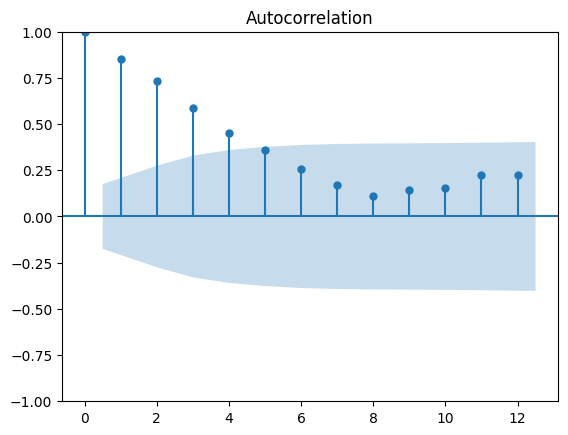

In [238]:
plot_acf(dataframe, lags=12)
plt.show()

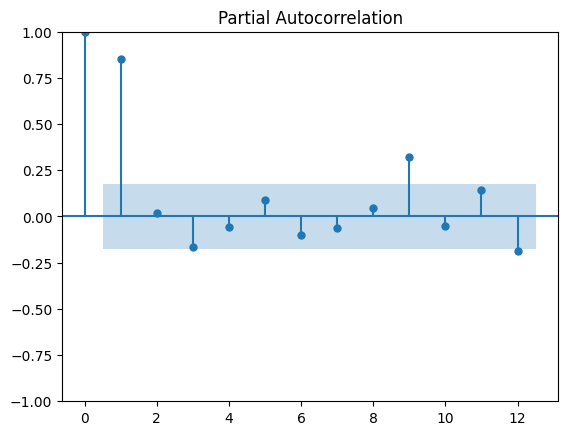

In [239]:
plot_pacf(dataframe, lags=12)
plt.show()

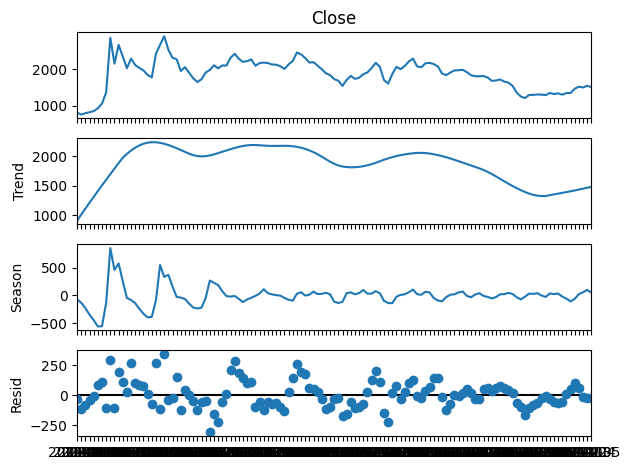

In [240]:
df_colum = dataframe['Close']
res = STL(df_colum, period=12).fit()
res.plot()
plt.show()

In [241]:
model = ARIMA(dataframe, order=(3, 1, 8))
modelfit = model.fit()

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [242]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  125
Model:                 ARIMA(3, 1, 8)   Log Likelihood                -837.433
Date:                Sat, 08 Jun 2024   AIC                           1698.866
Time:                        11:34:51   BIC                           1732.709
Sample:                    01-01-2014   HQIC                          1712.614
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6909      0.063     10.908      0.000       0.567       0.815
ar.L2          0.7042      0.080      8.749      0.000       0.546       0.862
ar.L3         -0.9837      0.054    -18.081      0.000      -1.090      -0.877
ma.L1         -0.8317   1.47e+05  -5.67e-06      1.000   -2.87e+05    2.87e+05
ma.L2         -0.4961   1.81e+05  -2.74e-06      1.000   -3.55e+05    3.55e+05
ma.L3          0.8787   2.87e+04   3.06e-05      1.000   -5.62e+04    5.62e+04
ma.L4         -0.3936    3.6e+04  -1.09e-05      1.000   -7.06e+04    7.06e+04
ma.L5          0.2513   9956.807   2.52e-05      1.000   -1.95e+04    1.95e+04
ma.L6         -0.0200   3.84e+04  -5.19e-07      1.000   -7.53e+04    7.53e+04
ma.L7         -0.2983   1.33e+04  -2.25e-05      1.000    -2.6e+04     2.6e+04
ma.L8         -0.0904      0.105     -0.859      0.390      -0.297       0.116
sigma2      3.694e+04     14.072   2625.145      0.000    3.69e+04     3.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              1086.04
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.44e+25. Standard errors may be unstable.
"""

In [243]:
predict = modelfit.predict(start=len(dataframe), end=len(dataframe) + 12)

In [244]:
trace1 = go.Scatter(x=dataframe.index, y=dataframe['Close'], mode='lines', name='Close')
trace2 = go.Scatter(x=predict.index, y=predict.values, mode='lines', name='ARIMA Predict')

# Configurar layout do gráfico
layout = go.Layout(
    title='Previsão close KFC ',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valores'),
    template='plotly_dark'
)

# Criar figura
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostrar gráfico
fig.show()